In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [2]:
path_to_repo = "/mnt/nas_home/mrgj4/final_repo/thesis-code/"

In [3]:
languages = ["tr", "sw", "ta", "id", "zh"]

setups = ["pretrain_cs_finetune_n", "pretrain_n_finetune_cs", "pretrain_cs_finetune_cs"]

seeds = ["seed1", "seed2", "seed3"]

In [4]:
baseline_results_mUNITER = {}

for lang in languages:

    epoch_results = {}
    with open(path_to_repo + "experiment_1/{l}/baseline/test/pytorch_model_best.bin-/eval.txt".format(l = lang)) as f:
        lines = f.readlines()
        score = float(lines[0].split(" ")[-2])
        epoch_results["best"] = score
    baseline_results_mUNITER[lang] = epoch_results

In [5]:
# From the MaRVL paper
translate_test_baseline_results_mUNITER = {
    "id": {"best": 59.8},
    "sw": {"best": 63.4},
    "ta": {"best": 62.3},
    "tr": {"best": 69.2},
    "zh": {"best": 62.7},
}

baseline_results_xUNITER = {
    "id": {"best": 57.1},
    "sw": {"best": 55.5},
    "ta": {"best": 55.1},
    "tr": {"best": 58.0},
    "zh": {"best": 55.0},
}

translate_test_baseline_results_xUNITER = {
    "id": {"best": 62.4},
    "sw": {"best": 64.1},
    "ta": {"best": 62.4},
    "tr": {"best": 69.8},
    "zh": {"best": 63.3},
}

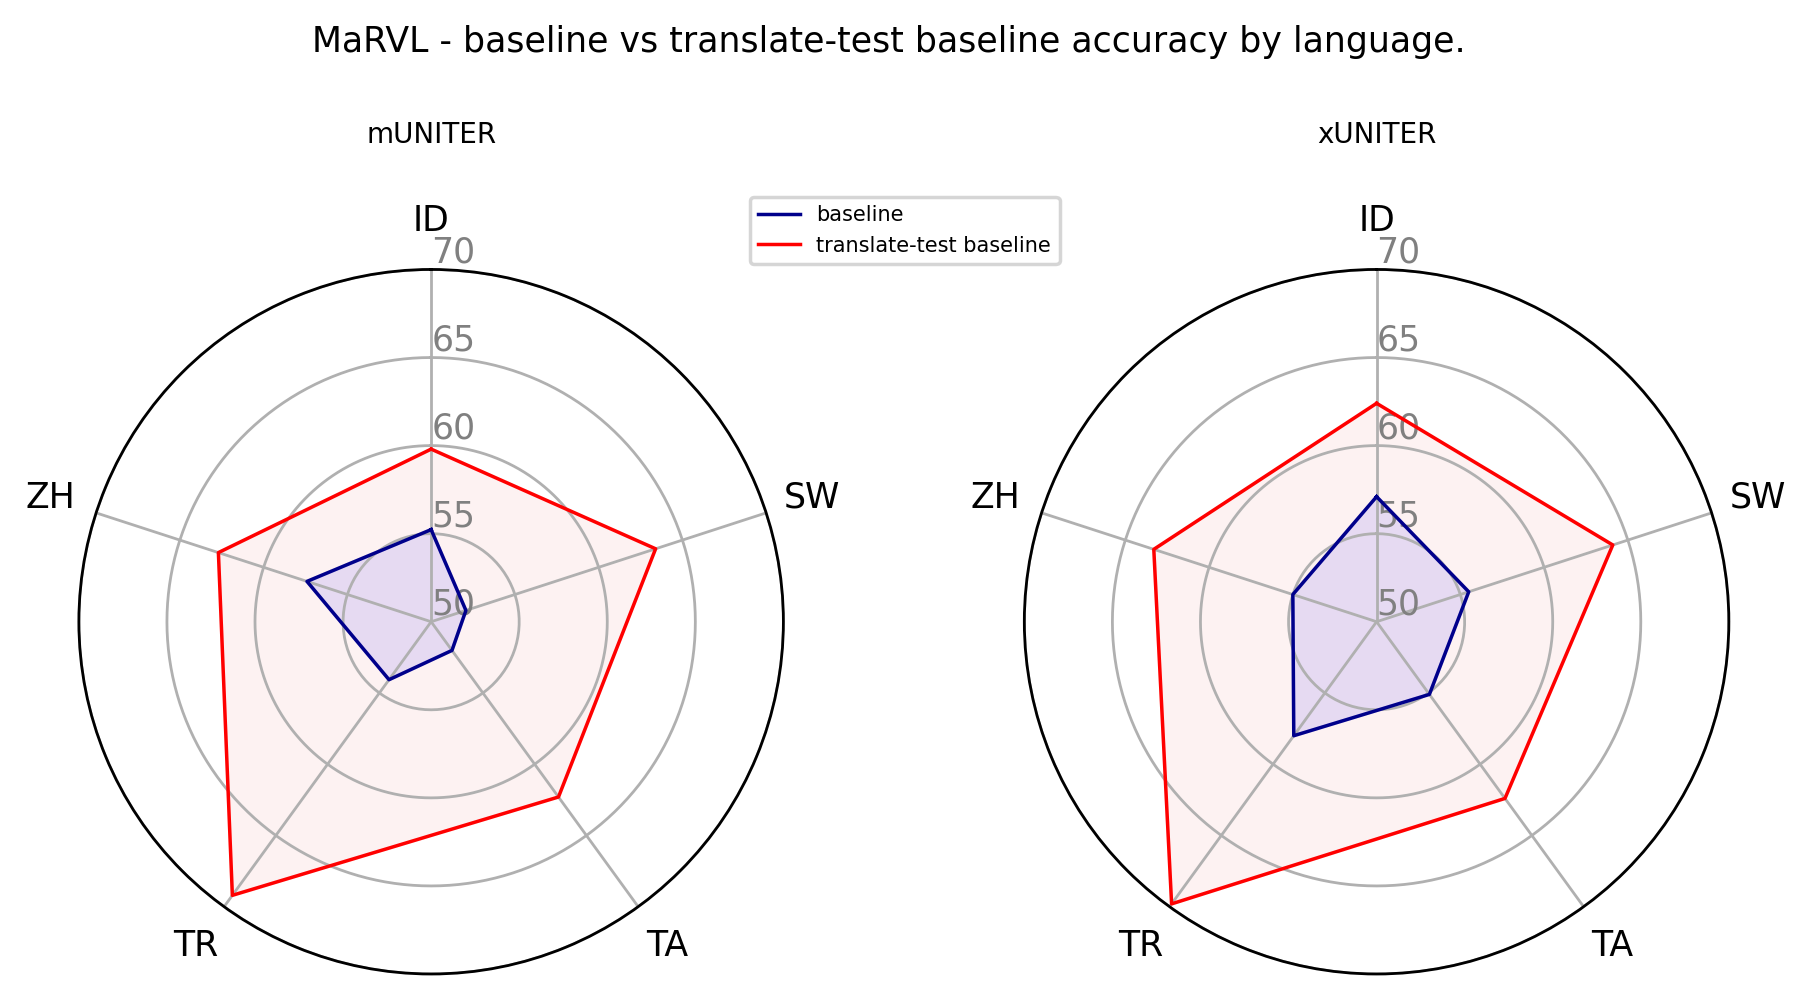

In [7]:
plt.rcParams['figure.dpi'] = 250
plt.rcParams["figure.figsize"] = (8, 5)

# Set data
df_mUNITER = pd.DataFrame({
'group': ['baseline','translate-test baseline',],
'ID': [baseline_results_mUNITER["id"]["best"], translate_test_baseline_results_mUNITER["id"]["best"]],
'SW': [baseline_results_mUNITER["sw"]["best"], translate_test_baseline_results_mUNITER["sw"]["best"]],
'TA': [baseline_results_mUNITER["ta"]["best"], translate_test_baseline_results_mUNITER["ta"]["best"]],
'TR': [baseline_results_mUNITER["tr"]["best"], translate_test_baseline_results_mUNITER["tr"]["best"]],
'ZH': [baseline_results_mUNITER["zh"]["best"], translate_test_baseline_results_mUNITER["zh"]["best"]]
})

df_xUNITER = pd.DataFrame({
'group': ['baseline','translate-test baseline',],
'ID': [baseline_results_xUNITER["id"]["best"], translate_test_baseline_results_xUNITER["id"]["best"]],
'SW': [baseline_results_xUNITER["sw"]["best"], translate_test_baseline_results_xUNITER["sw"]["best"]],
'TA': [baseline_results_xUNITER["ta"]["best"], translate_test_baseline_results_xUNITER["ta"]["best"]],
'TR': [baseline_results_xUNITER["tr"]["best"], translate_test_baseline_results_xUNITER["tr"]["best"]],
'ZH': [baseline_results_xUNITER["zh"]["best"], translate_test_baseline_results_xUNITER["zh"]["best"]]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_mUNITER)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
#ax = plt.subplot(111, polar=True)

fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection="polar"))
box = ax2.get_position()
box.x0 = box.x0 + 0.05
box.x1 = box.x1 + 0.05
ax2.set_position(box)
 
# If you want the first axis to be on top:
ax1.set_theta_offset(pi / 2)
ax1.set_theta_direction(-1)
ax2.set_theta_offset(pi / 2)
ax2.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
#ax.set_thetagrids(self.angles, labels=titles, fontsize=12, weight="bold", color="black")
ax1.set_thetagrids([0, 72, 144, 216, 288], categories)
ax2.set_thetagrids([0, 72, 144, 216, 288], categories)
 
# Draw ylabels
ax1.set_rlabel_position(0)
ax2.set_rlabel_position(0)
ax1.set_yticks([50,55,60,65,70])
ax1.set_yticklabels(["50","55","60", "65", "70"])
ax2.set_yticks([50,55,60,65,70])
ax2.set_yticklabels(["50","55","60", "65", "70"])
ax1.tick_params(axis = "y", colors='grey', size=7)
ax2.tick_params(axis = "y", colors='grey', size=7)
ax1.set_ylim(50,70)
ax2.set_ylim(50,70)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 

# Ind1
values = df_mUNITER.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values = np.asarray(values)
ax1.plot(angles, values, linewidth=1, linestyle='solid', color="darkblue", label="baseline")
ax1.fill(angles, values, color="blue", alpha=0.1)

values = df_xUNITER.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values = np.asarray(values)
ax2.plot(angles, values, linewidth=1, linestyle='solid', color="darkblue")
ax2.fill(angles, values, color="blue", alpha=0.1)
 
# Ind2
values = df_mUNITER.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax1.plot(angles, values, linewidth=1, linestyle='solid', color="red", label="translate-test baseline")
ax1.fill(angles, values, color = "lightcoral", alpha=0.1)

# Ind2
values = df_xUNITER.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax2.plot(angles, values, linewidth=1, linestyle='solid', color="red")
ax2.fill(angles, values, color = "lightcoral", alpha=0.1)

ax1.set_title("mUNITER", y = 1.15, fontsize=8)
ax2.set_title("xUNITER", y = 1.15, fontsize=8)
 
# Add legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, prop={'size': 6},  bbox_to_anchor=(0.535, 0.65))
fig.suptitle("MaRVL - baseline vs translate-test baseline accuracy by language.", x= 0.53, size = 10)

# Show the graph
plt.show()

In [9]:
lang_results_mUNITER = {}

for lang in languages:

    setup_results = {}

    for setup in setups:
        seed_results = {}
        for seed in seeds:
            with open(path_to_repo + "experiment_3/{l}/{s}/{setup}/test/pytorch_model_best.bin-/eval.txt".format(l = lang, setup = setup, s = seed)) as f:
                lines = f.readlines()
                score = float(lines[0].split(" ")[-2])
            seed_results[seed] = score 
        setup_results[setup] = seed_results  
    
    lang_results_mUNITER[lang] = setup_results

In [10]:
lang_results_xUNITER = {}

for lang in languages:

    setup_results = {}
    seed_results = {}
    for seed in seeds:
        with open(path_to_repo + "experiment_3/xUNITER/{l}/{s}/test/pytorch_model_best.bin-/eval.txt".format(l = lang, setup = setup, s = seed)) as f:
            lines = f.readlines()
            score = float(lines[0].split(" ")[-2])
        seed_results[seed] = score 
    setup_results["pretrain_cs_finetune_cs"] = seed_results  
    
    lang_results_xUNITER[lang] = setup_results

In [11]:
def get_avg_std(lang, lang_results, setups):
    results = lang_results[lang]

    means = []
    stds = []

    for setup in setups:
        setup_results = np.asarray([results[setup]["seed1"], results[setup]["seed2"], results[setup]["seed3"]])
        means.append(setup_results.mean())
        stds.append(setup_results.std())
    
    return means, stds

In [18]:
def plot_results(lang, means_mUNITER, mean_xUNITER, stds_mUNITER, std_xUNITER, ylim = [50, 61]):
    
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams["figure.figsize"] = (10, 8)

    # width of the bars
    barWidth = 0.5
    
    # Choose the height of the blue bars
    bars1 = means_mUNITER
    bars2 = [0, 0, mean_xUNITER]
    
    # Choose the height of the error bars (bars1)
    yer1 = [2 * std for std in stds_mUNITER]
    yer2 = [0, 0, std_xUNITER]
    
    # The x position of bars
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    
    plt.bar(r1, bars1, width = barWidth, color = 'lightcyan', edgecolor = 'black', yerr=yer1, capsize=7, label="mUNITER")
    plt.bar(r2, bars2, width = barWidth, color = 'dodgerblue', edgecolor = 'black', yerr=yer2, capsize=7, label='xUNITER')

    plt.title("{l}".format(l = lang.upper()))
    plt.ylabel('Accuracy (%)')
    plt.ylim(ylim)
    plt.xticks([0, 1, 2.25], ['code-switched pretraining', 'code-switched finetuning', 'both'], size=8)
    plt.xlabel("Code-switched parts")
    # Show graphic
    plt.legend()
    plt.show()

### SW

In [19]:
means_sw_mUNITER, stds_sw_mUNITER = get_avg_std("sw", lang_results_mUNITER, setups)
means_sw_xUNITER, stds_sw_xUNITER = get_avg_std("sw", lang_results_xUNITER, ["pretrain_cs_finetune_cs"])

In [20]:
mean_p_cs_f_n_sw_mUNITER, mean_p_n_f_cs_sw_mUNITER, mean_p_cs_f_cs_sw_mUNITER = means_sw_mUNITER
std_p_cs_f_n_sw_mUNITER, std_p_n_f_cs_sw_mUNITER, std_p_cs_f_cs_sw_mUNITER = stds_sw_mUNITER

mean_p_cs_f_cs_sw_xUNITER = means_sw_xUNITER[0]
std_p_cs_f_cs_sw_xUNITER = stds_sw_xUNITER[0]

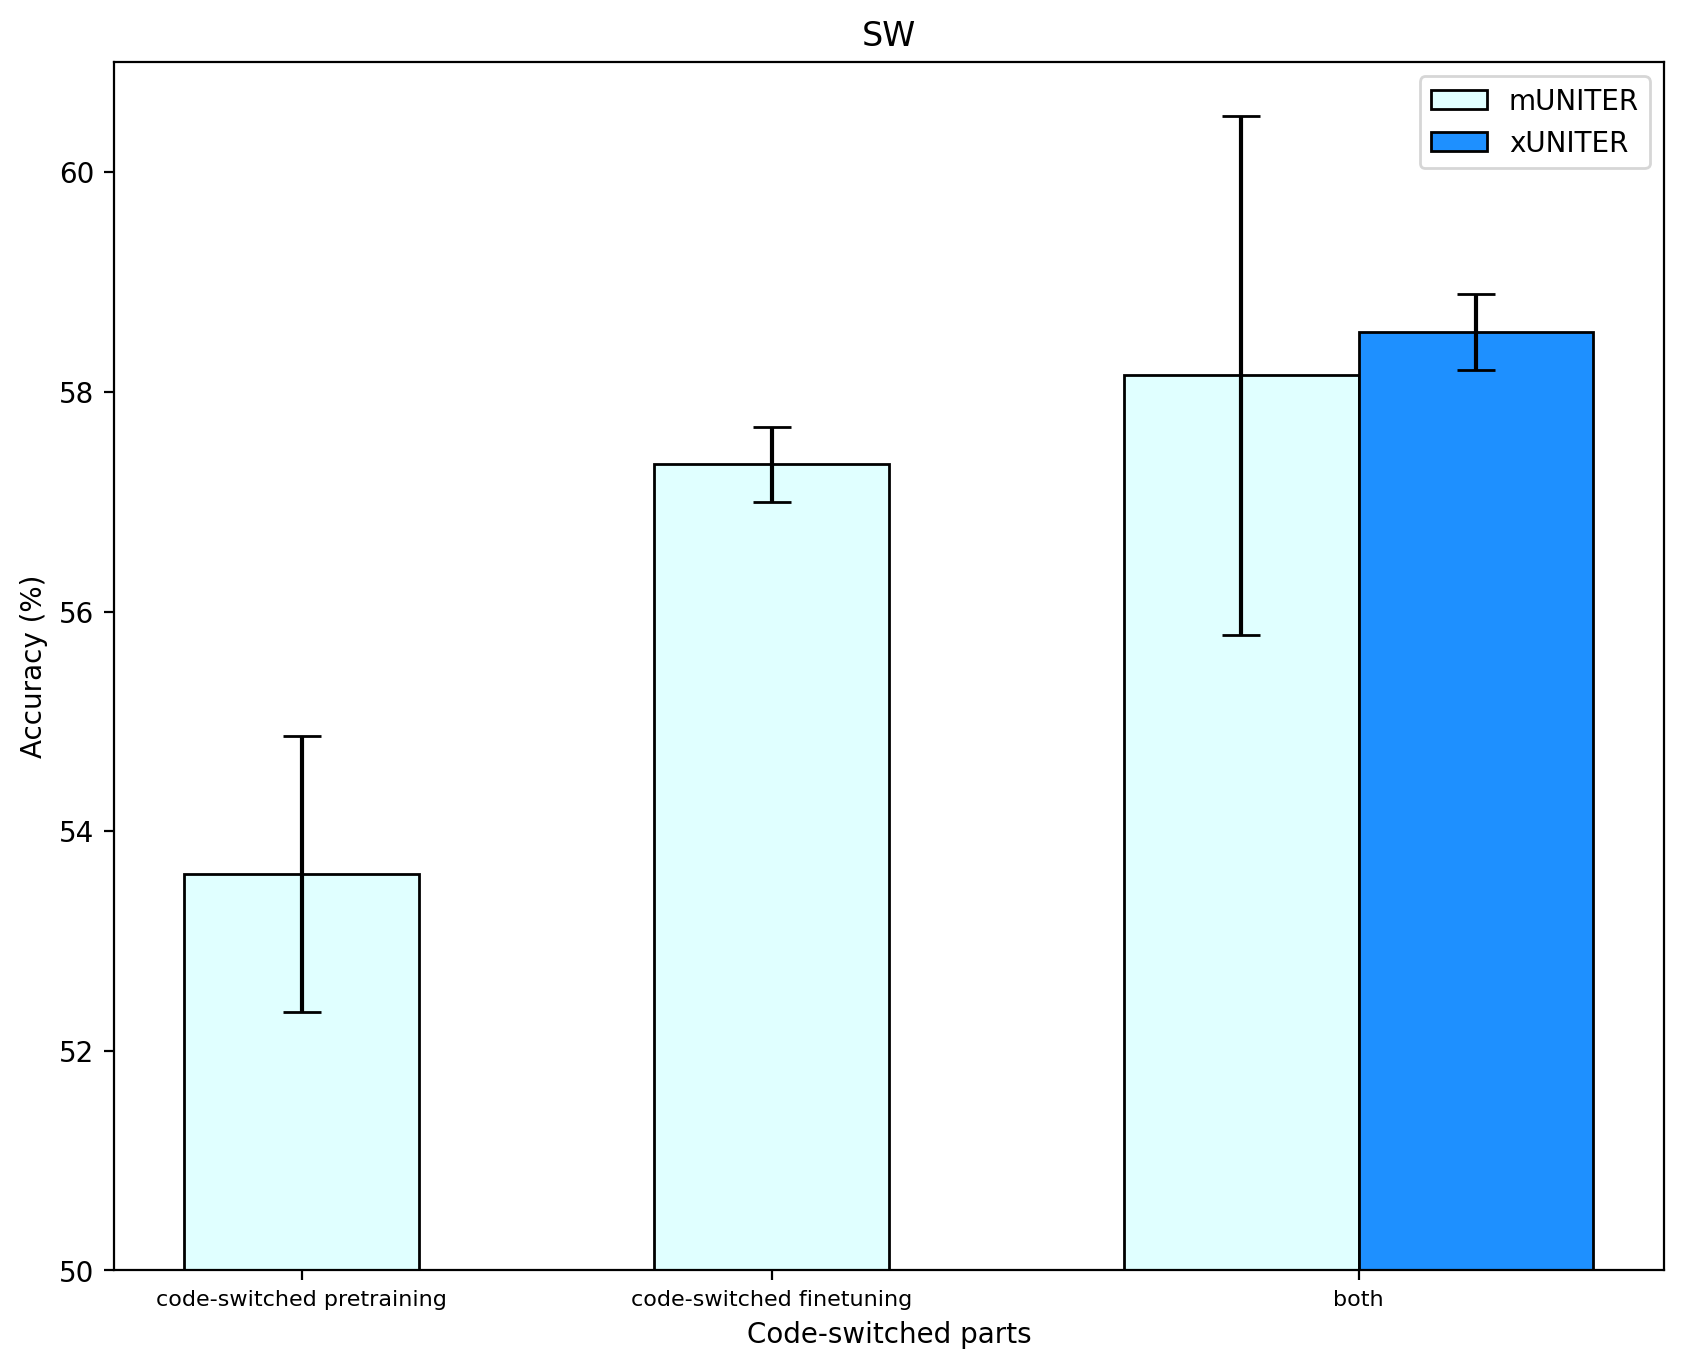

In [21]:
plot_results("sw", means_sw_mUNITER, mean_p_cs_f_cs_sw_xUNITER, stds_sw_mUNITER, std_p_cs_f_cs_sw_xUNITER)

### TA

In [22]:
means_ta_mUNITER, stds_ta_mUNITER = get_avg_std("ta", lang_results_mUNITER, setups)
means_ta_xUNITER, stds_ta_xUNITER = get_avg_std("ta", lang_results_xUNITER, ["pretrain_cs_finetune_cs"])

In [23]:
mean_p_cs_f_n_ta_mUNITER, mean_p_n_f_cs_ta_mUNITER, mean_p_cs_f_cs_ta_mUNITER = means_ta_mUNITER
std_p_cs_f_n_ta_mUNITER, std_p_n_f_cs_ta_mUNITER, std_p_cs_f_cs_ta_mUNITER = stds_ta_mUNITER

mean_p_cs_f_cs_ta_xUNITER = means_ta_xUNITER[0]
std_p_cs_f_cs_ta_xUNITER = stds_ta_xUNITER[0]

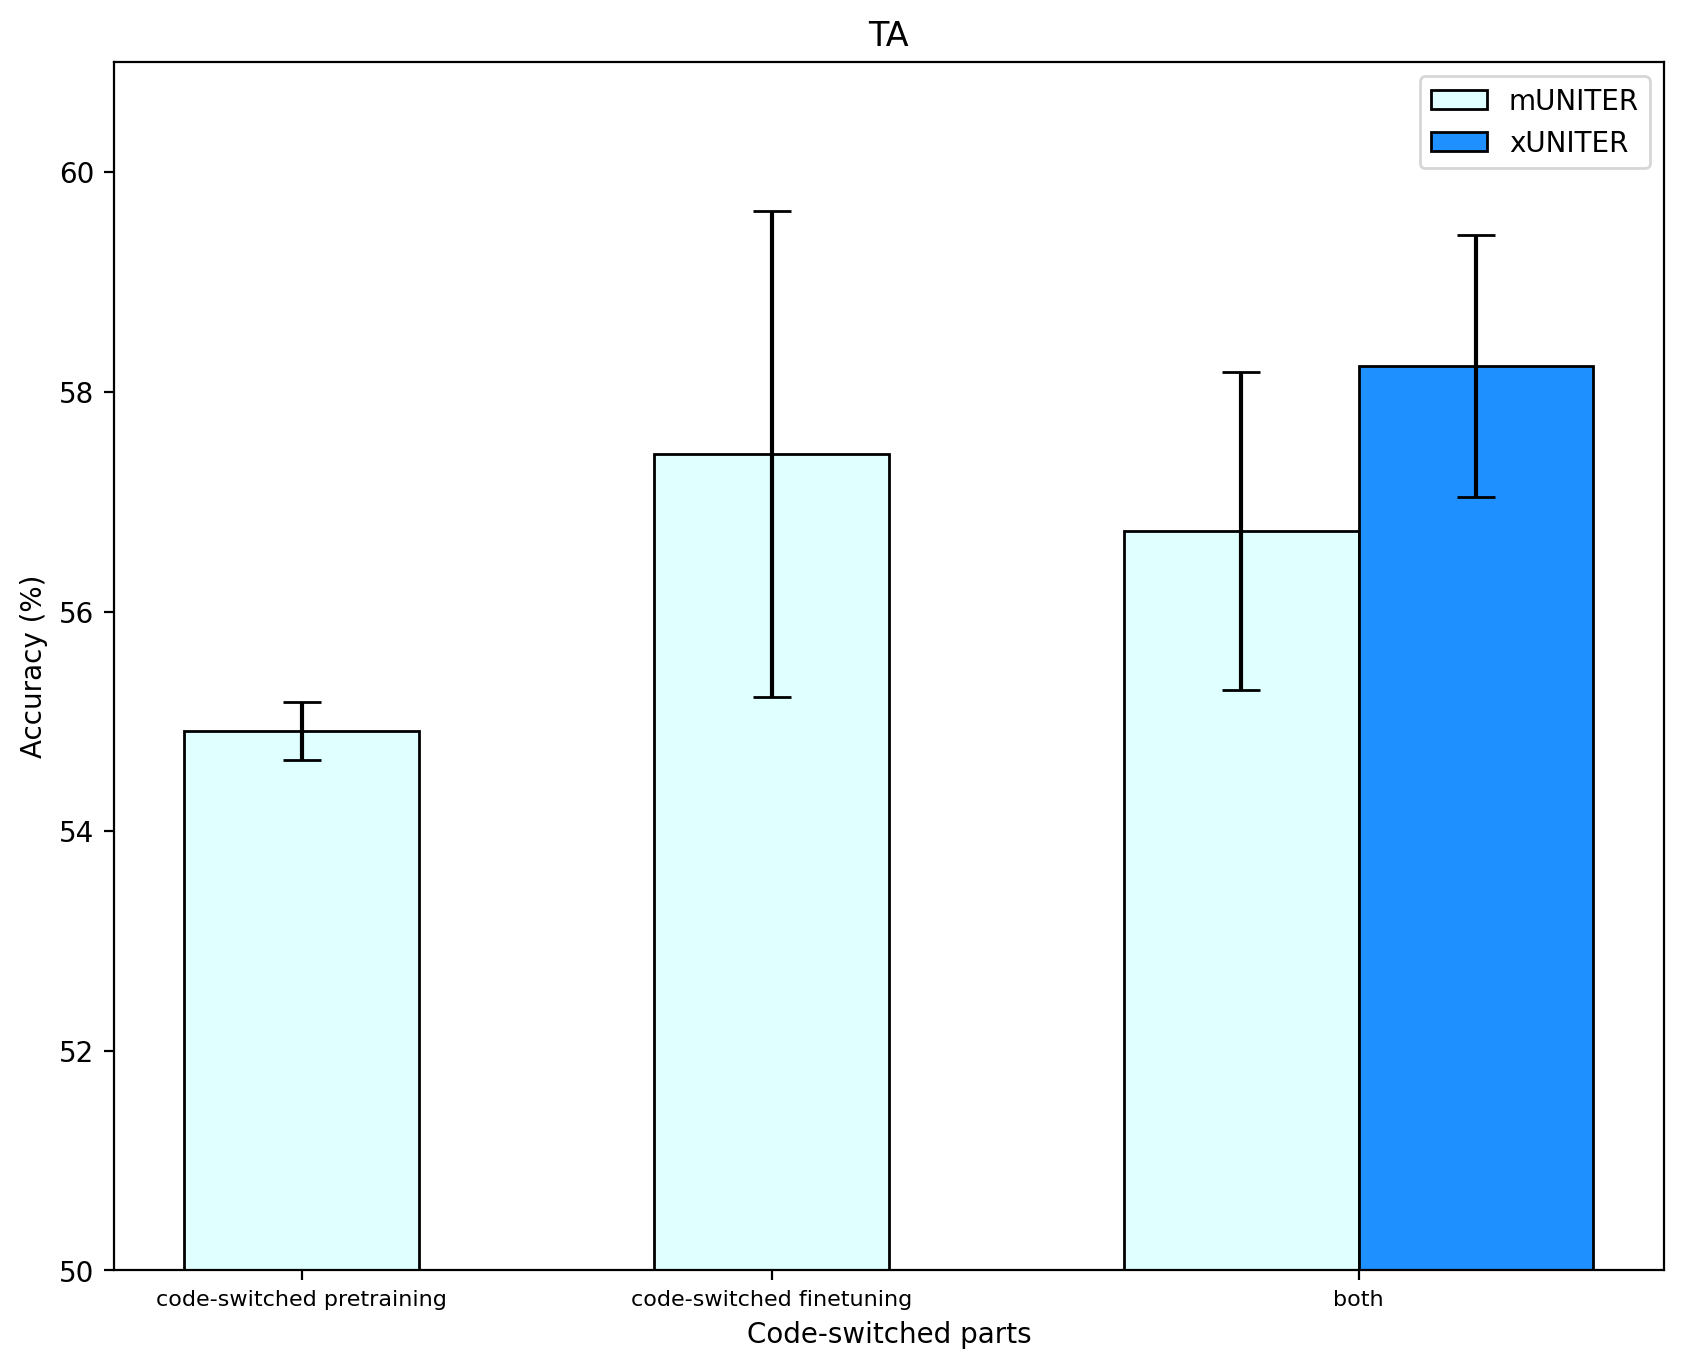

In [24]:
plot_results("ta", means_ta_mUNITER, mean_p_cs_f_cs_ta_xUNITER, stds_ta_mUNITER, std_p_cs_f_cs_ta_xUNITER)

### TR

In [25]:
means_tr_mUNITER, stds_tr_mUNITER = get_avg_std("tr", lang_results_mUNITER, setups)
means_tr_xUNITER, stds_tr_xUNITER = get_avg_std("tr", lang_results_xUNITER, ["pretrain_cs_finetune_cs"])

In [26]:
mean_p_cs_f_n_tr_mUNITER, mean_p_n_f_cs_tr_mUNITER, mean_p_cs_f_cs_tr_mUNITER = means_tr_mUNITER
std_p_cs_f_n_tr_mUNITER, std_p_n_f_cs_tr_mUNITER, std_p_cs_f_cs_tr_mUNITER = stds_tr_mUNITER

mean_p_cs_f_cs_tr_xUNITER = means_tr_xUNITER[0]
std_p_cs_f_cs_tr_xUNITER = stds_tr_xUNITER[0]

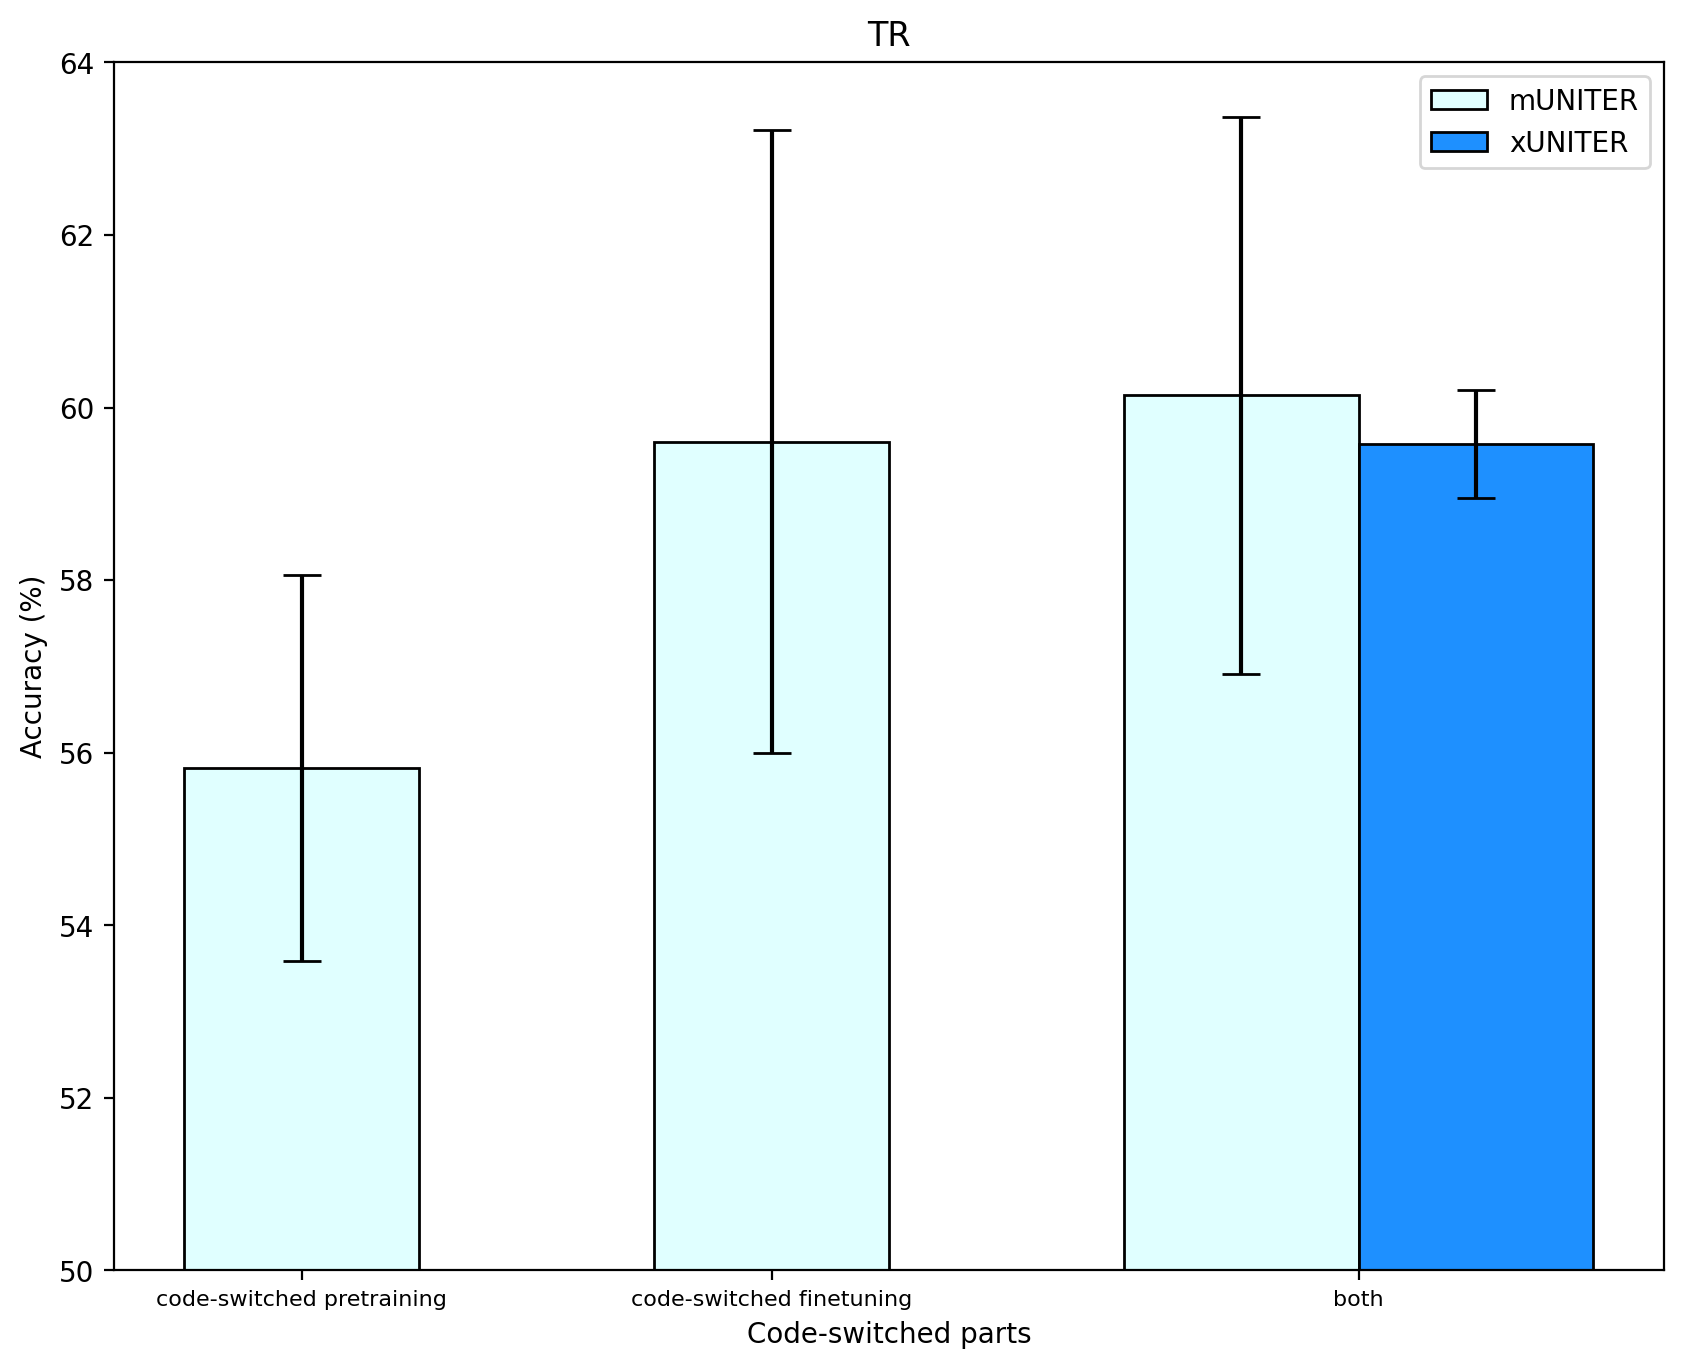

In [28]:
plot_results("tr", means_tr_mUNITER, mean_p_cs_f_cs_tr_xUNITER, stds_tr_mUNITER, std_p_cs_f_cs_tr_xUNITER, [50, 64])

### ID

In [29]:
means_id_mUNITER, stds_id_mUNITER = get_avg_std("id", lang_results_mUNITER, setups)
means_id_xUNITER, stds_id_xUNITER = get_avg_std("id", lang_results_xUNITER, ["pretrain_cs_finetune_cs"])

In [30]:
mean_p_cs_f_n_id_mUNITER, mean_p_n_f_cs_id_mUNITER, mean_p_cs_f_cs_id_mUNITER = means_id_mUNITER
std_p_cs_f_n_id_mUNITER, std_p_n_f_cs_id_mUNITER, std_p_cs_f_cs_id_mUNITER = stds_id_mUNITER

mean_p_cs_f_cs_id_xUNITER = means_id_xUNITER[0]
std_p_cs_f_cs_id_xUNITER = stds_id_xUNITER[0]

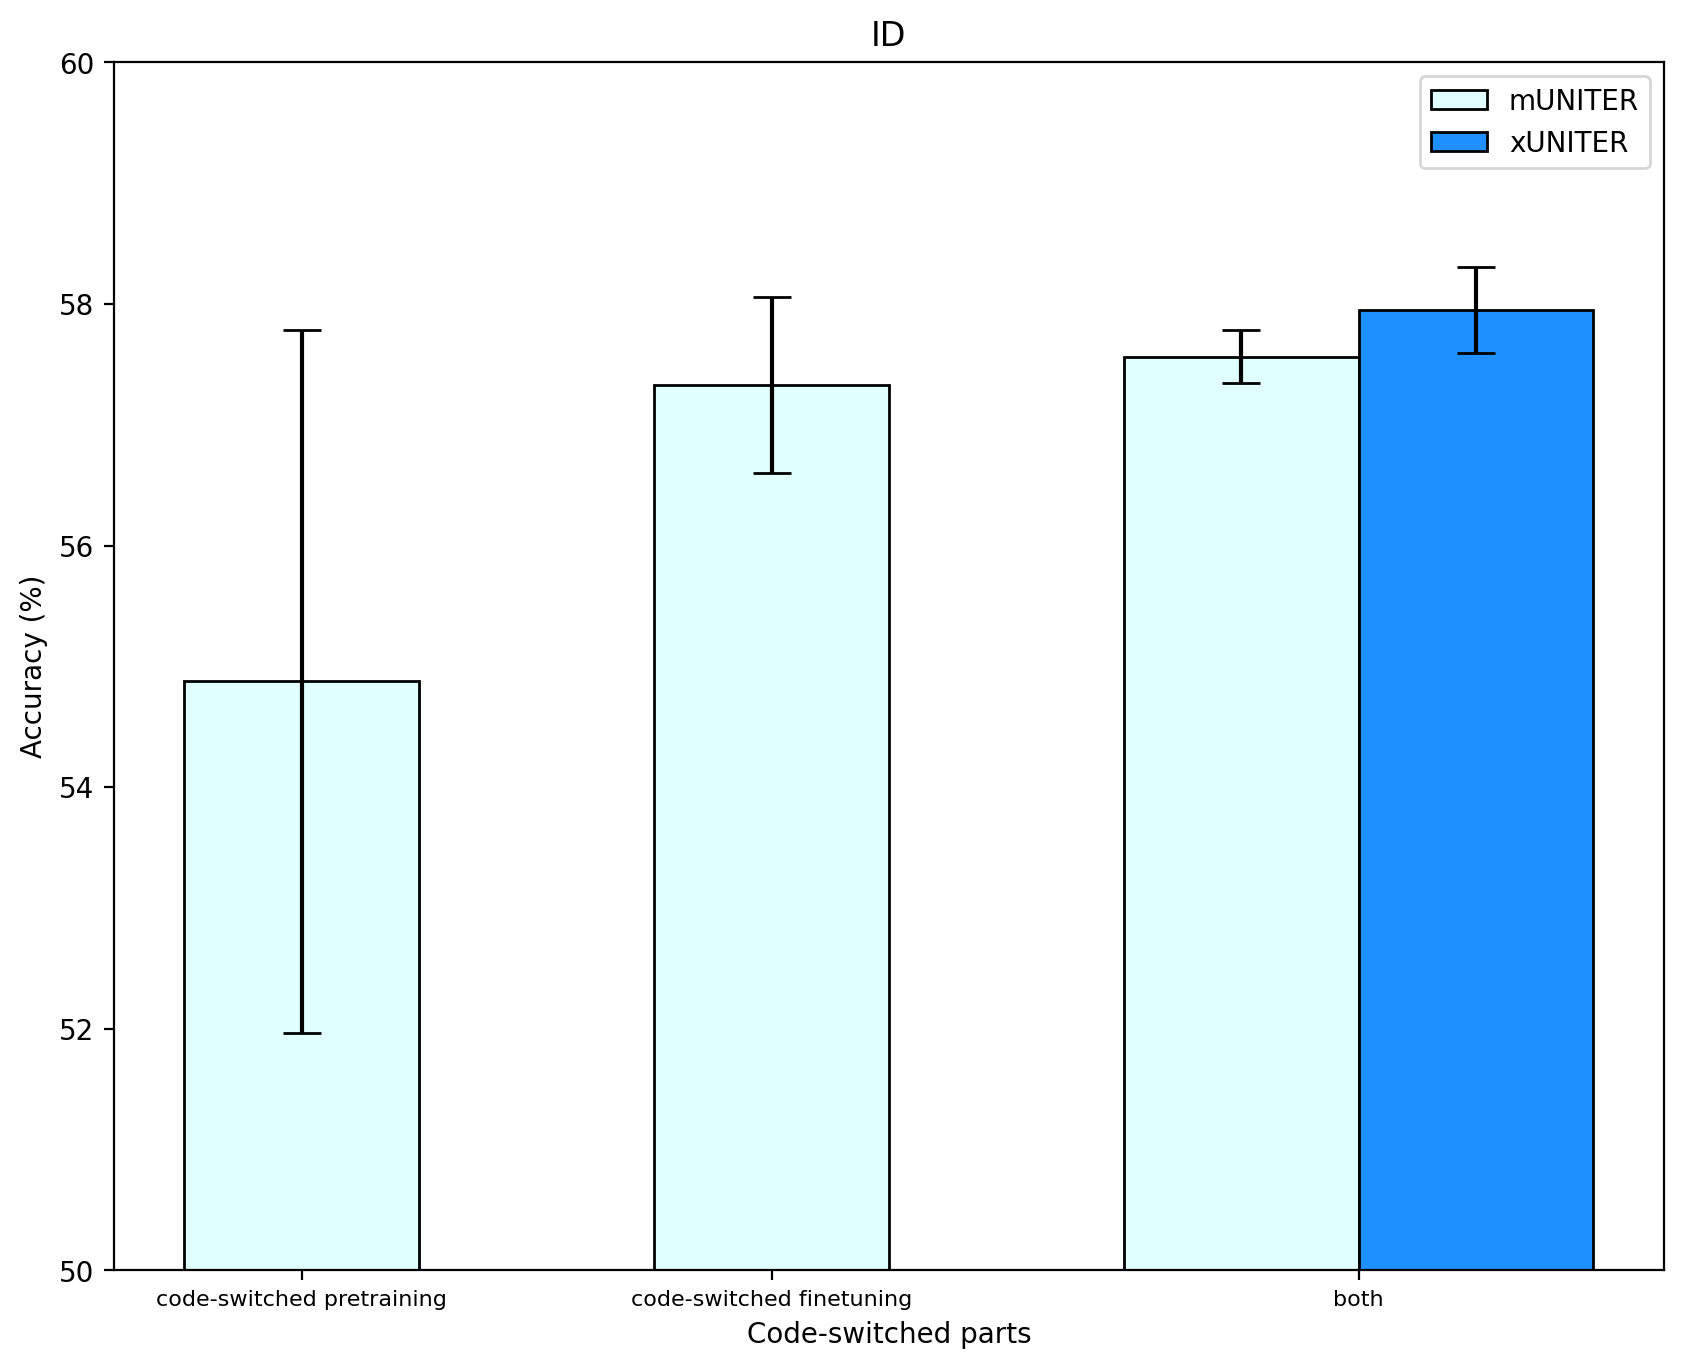

In [31]:
plot_results("id", means_id_mUNITER, mean_p_cs_f_cs_id_xUNITER, stds_id_mUNITER, std_p_cs_f_cs_id_xUNITER, ylim=[50, 60])

### ZH

In [32]:
means_zh_mUNITER, stds_zh_mUNITER = get_avg_std("zh", lang_results_mUNITER, setups)
means_zh_xUNITER, stds_zh_xUNITER = get_avg_std("zh", lang_results_xUNITER, ["pretrain_cs_finetune_cs"])

In [33]:
mean_p_cs_f_n_zh_mUNITER, mean_p_n_f_cs_zh_mUNITER, mean_p_cs_f_cs_zh_mUNITER = means_zh_mUNITER
std_p_cs_f_n_zh_mUNITER, std_p_n_f_cs_zh_mUNITER, std_p_cs_f_cs_zh_mUNITER = stds_zh_mUNITER

mean_p_cs_f_cs_zh_xUNITER = means_zh_xUNITER[0]
std_p_cs_f_cs_zh_xUNITER = stds_zh_xUNITER[0]

In [56]:
mean_p_cs_f_cs_zh_xUNITER

57.411

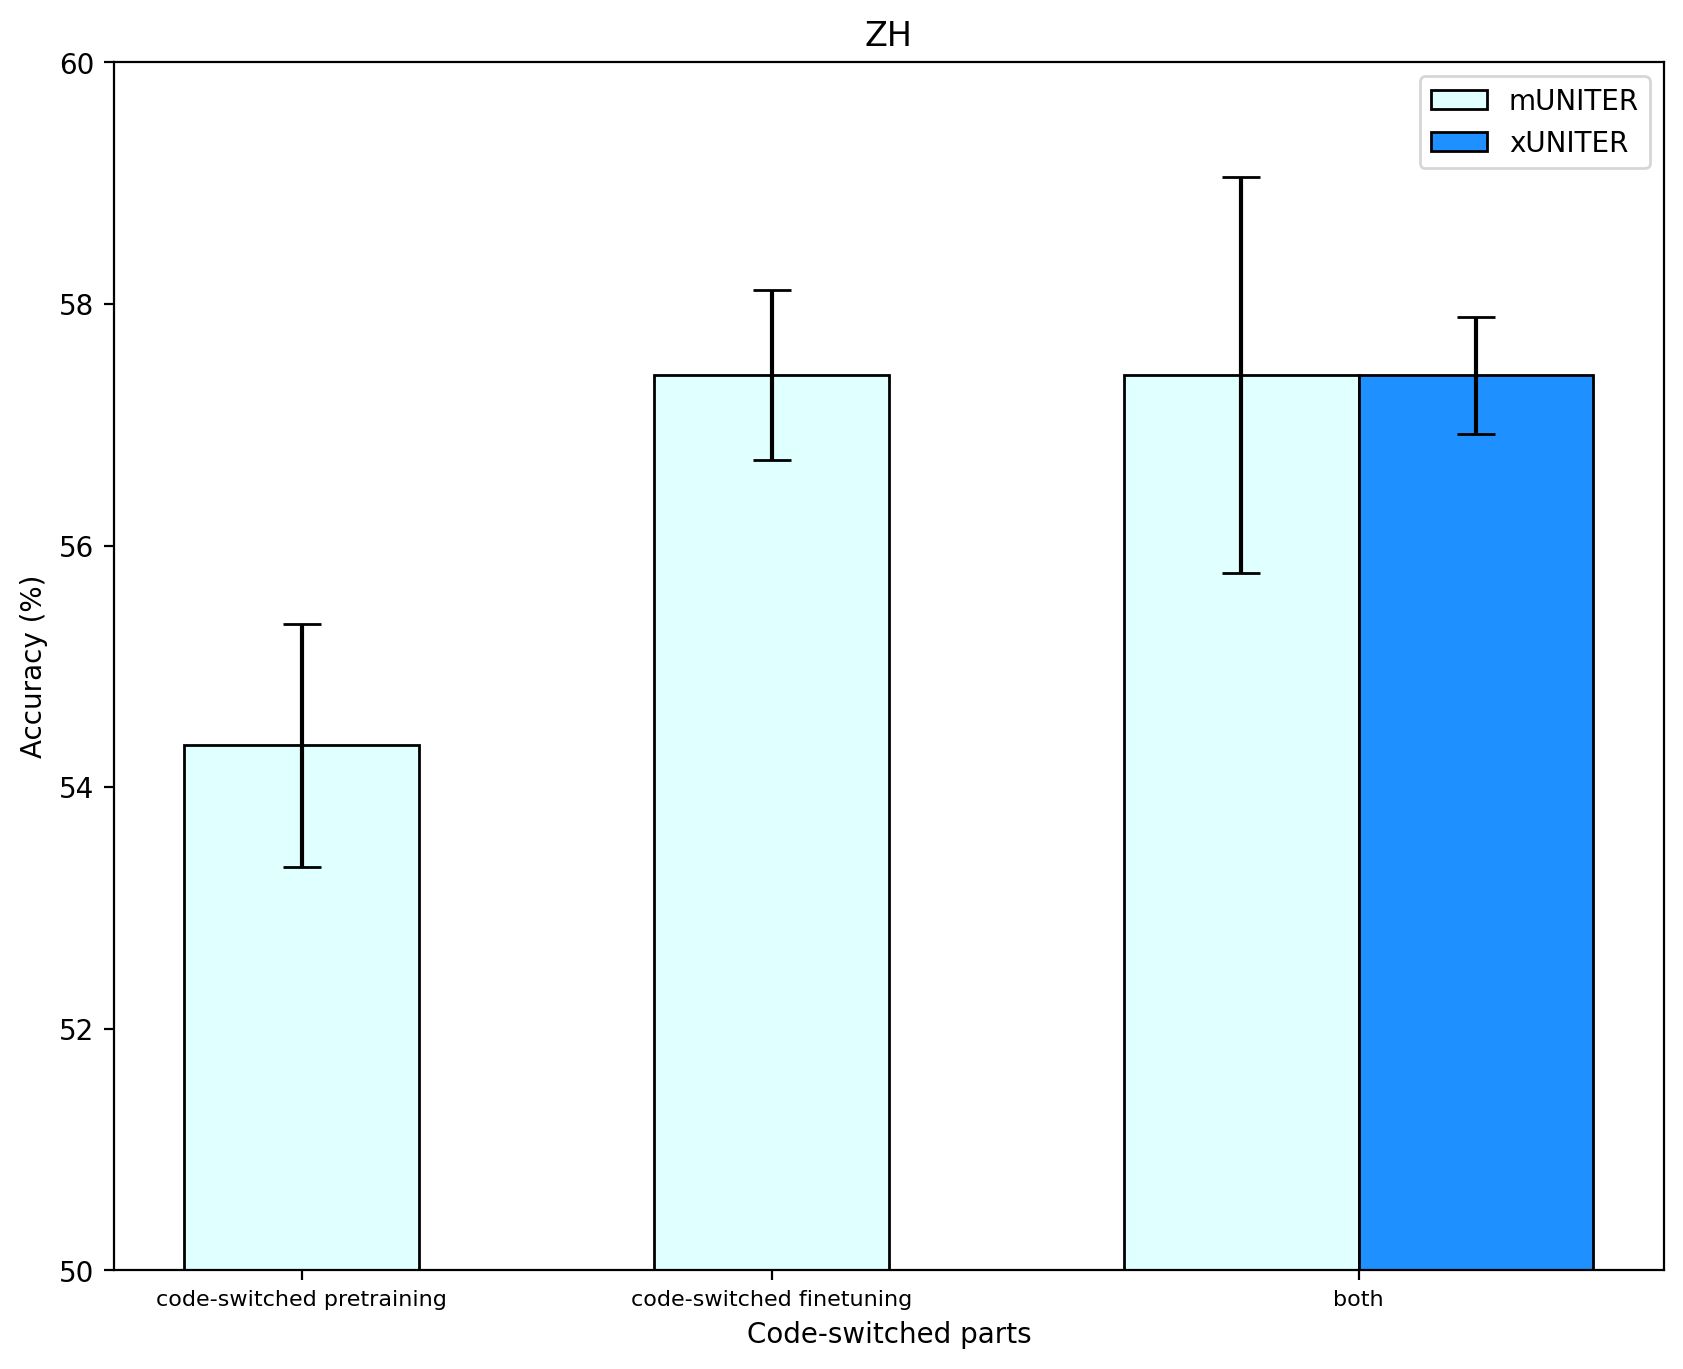

In [34]:
plot_results("zh", means_zh_mUNITER, mean_p_cs_f_cs_zh_xUNITER, stds_zh_mUNITER, std_p_cs_f_cs_zh_xUNITER, ylim=[50, 60])

### ALL

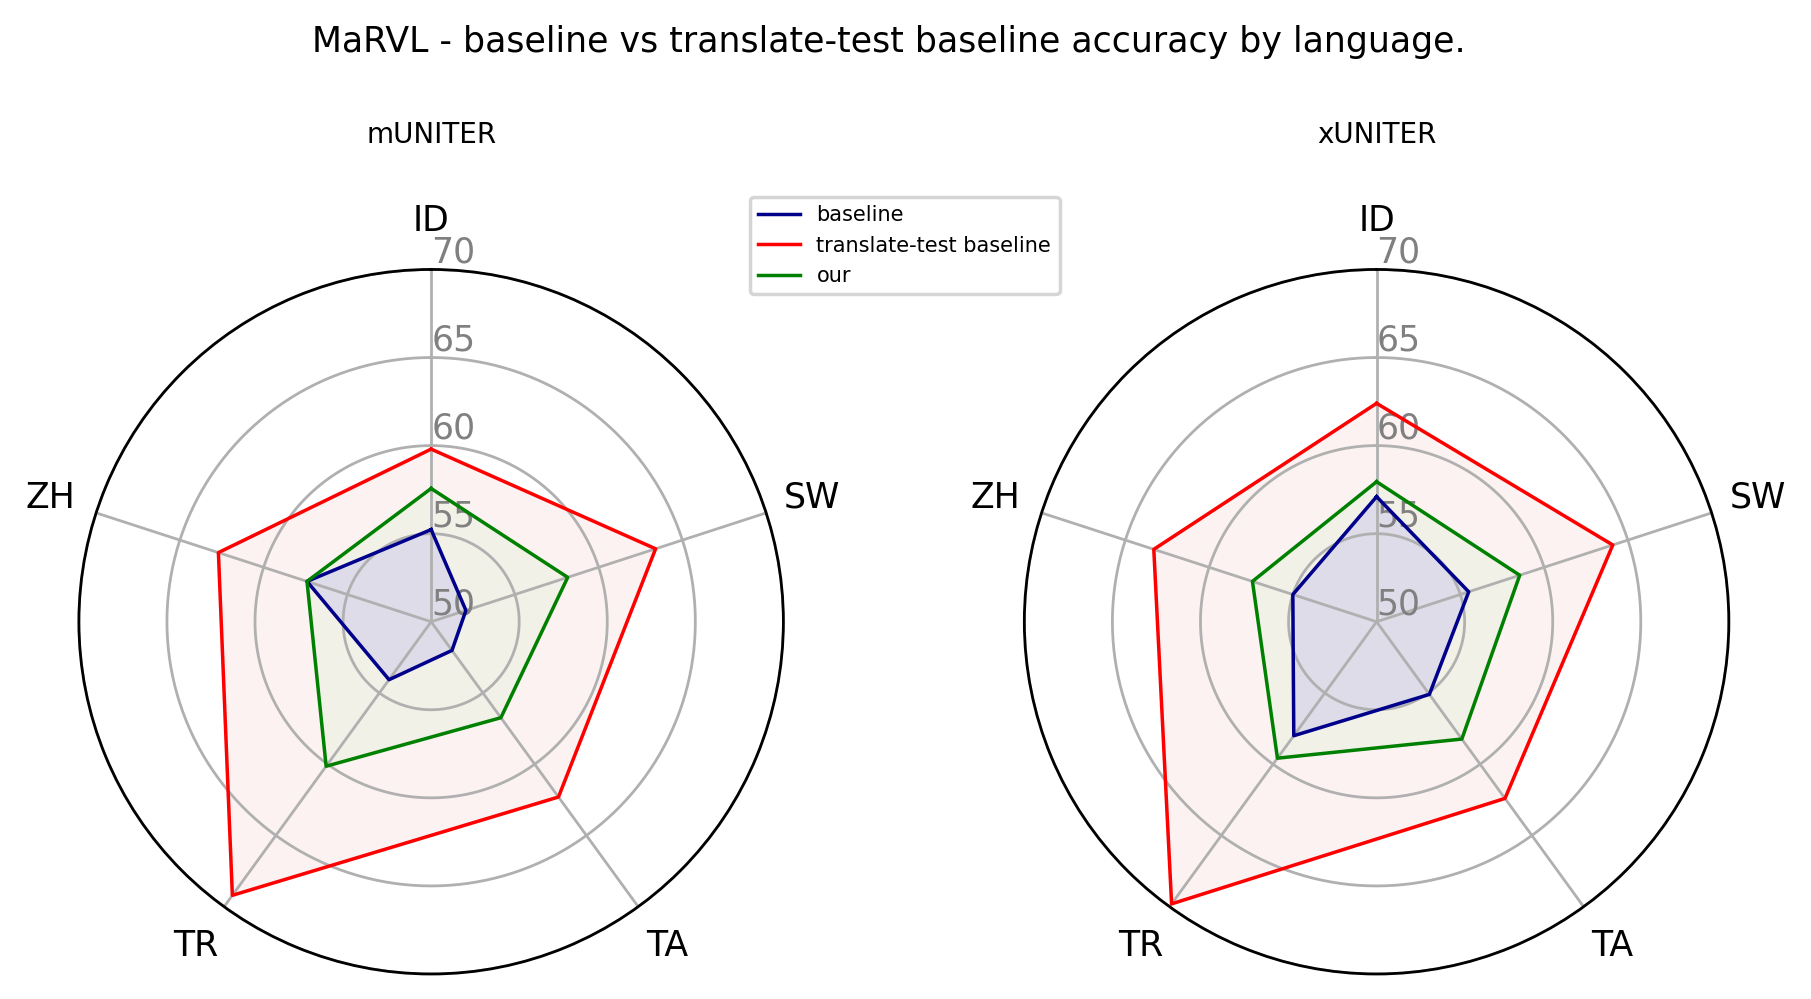

In [35]:
plt.rcParams['figure.dpi'] = 250
plt.rcParams["figure.figsize"] = (8, 5)

# Set data
df_mUNITER = pd.DataFrame({
'group': ['baseline','translate-test baseline', 'our'],
'ID': [baseline_results_mUNITER["id"]["best"], translate_test_baseline_results_mUNITER["id"]["best"], mean_p_cs_f_cs_id_mUNITER],
'SW': [baseline_results_mUNITER["sw"]["best"], translate_test_baseline_results_mUNITER["sw"]["best"], mean_p_cs_f_cs_sw_mUNITER],
'TA': [baseline_results_mUNITER["ta"]["best"], translate_test_baseline_results_mUNITER["ta"]["best"], mean_p_cs_f_cs_ta_mUNITER],
'TR': [baseline_results_mUNITER["tr"]["best"], translate_test_baseline_results_mUNITER["tr"]["best"], mean_p_cs_f_cs_tr_mUNITER],
'ZH': [baseline_results_mUNITER["zh"]["best"], translate_test_baseline_results_mUNITER["zh"]["best"], mean_p_cs_f_cs_zh_mUNITER]
})

df_xUNITER = pd.DataFrame({
'group': ['baseline','translate-test baseline', 'our'],
'ID': [baseline_results_xUNITER["id"]["best"], translate_test_baseline_results_xUNITER["id"]["best"], mean_p_cs_f_cs_id_xUNITER],
'SW': [baseline_results_xUNITER["sw"]["best"], translate_test_baseline_results_xUNITER["sw"]["best"], mean_p_cs_f_cs_sw_xUNITER],
'TA': [baseline_results_xUNITER["ta"]["best"], translate_test_baseline_results_xUNITER["ta"]["best"], mean_p_cs_f_cs_ta_xUNITER],
'TR': [baseline_results_xUNITER["tr"]["best"], translate_test_baseline_results_xUNITER["tr"]["best"], mean_p_cs_f_cs_tr_xUNITER],
'ZH': [baseline_results_xUNITER["zh"]["best"], translate_test_baseline_results_xUNITER["zh"]["best"], mean_p_cs_f_cs_zh_xUNITER]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_mUNITER)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
#ax = plt.subplot(111, polar=True)

fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection="polar"))
box = ax2.get_position()
box.x0 = box.x0 + 0.05
box.x1 = box.x1 + 0.05
ax2.set_position(box)
 
# If you want the first axis to be on top:
ax1.set_theta_offset(pi / 2)
ax1.set_theta_direction(-1)
ax2.set_theta_offset(pi / 2)
ax2.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
#ax.set_thetagrids(self.angles, labels=titles, fontsize=12, weight="bold", color="black")
ax1.set_thetagrids([0, 72, 144, 216, 288], categories)
ax2.set_thetagrids([0, 72, 144, 216, 288], categories)
 
# Draw ylabels
ax1.set_rlabel_position(0)
ax2.set_rlabel_position(0)
ax1.set_yticks([50,55,60,65,70])
ax1.set_yticklabels(["50","55","60", "65", "70"])
ax2.set_yticks([50,55,60,65,70])
ax2.set_yticklabels(["50","55","60", "65", "70"])
ax1.tick_params(axis = "y", colors='grey', size=7)
ax2.tick_params(axis = "y", colors='grey', size=7)
ax1.set_ylim(50,70)
ax2.set_ylim(50,70)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 

# Ind1
values = df_mUNITER.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values = np.asarray(values)
ax1.plot(angles, values, linewidth=1, linestyle='solid', color="darkblue", label='baseline')
ax1.fill(angles, values, color="blue", alpha=0.1)

values = df_xUNITER.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values = np.asarray(values)
ax2.plot(angles, values, linewidth=1, linestyle='solid', color='darkblue')
ax2.fill(angles, values, color="blue", alpha=0.1)
 
# Ind2
values = df_mUNITER.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax1.plot(angles, values, linewidth=1, linestyle='solid', color="red", label='translate-test baseline')
ax1.fill(angles, values, color = "lightcoral", alpha=0.1)

# Ind2
values = df_xUNITER.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax2.plot(angles, values, linewidth=1, linestyle='solid', color='red')
ax2.fill(angles, values, color = 'lightcoral', alpha=0.1)

# Ind3
values = df_mUNITER.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax1.plot(angles, values, linewidth=1, linestyle='solid', color="green", label='our')
ax1.fill(angles, values, color = 'lightgreen', alpha=0.1)

# Ind3
values = df_xUNITER.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax2.plot(angles, values, linewidth=1, linestyle='solid', color="green")
ax2.fill(angles, values, color = 'lightgreen', alpha=0.1)

ax1.set_title("mUNITER", y = 1.15, fontsize=8)
ax2.set_title("xUNITER", y = 1.15, fontsize=8)
 
# Add legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, prop={'size': 6},  bbox_to_anchor=(0.535, 0.65))
fig.suptitle("MaRVL - baseline vs translate-test baseline accuracy by language.", x= 0.53, size = 10)

# Show the graph
plt.show()